In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

%matplotlib inline

In [2]:
FULL_DATASET_PATH = os.path.join("datasets", "kc_housing", "kc_house_data.csv")

In [3]:
full_dataset = pd.read_csv(FULL_DATASET_PATH)

In [4]:
full_dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [6]:
full_dataset['price_cat'] = full_dataset.apply(
    lambda row: min(row['price'], 1000000), 
    axis=1
)

In [7]:
full_dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_cat
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


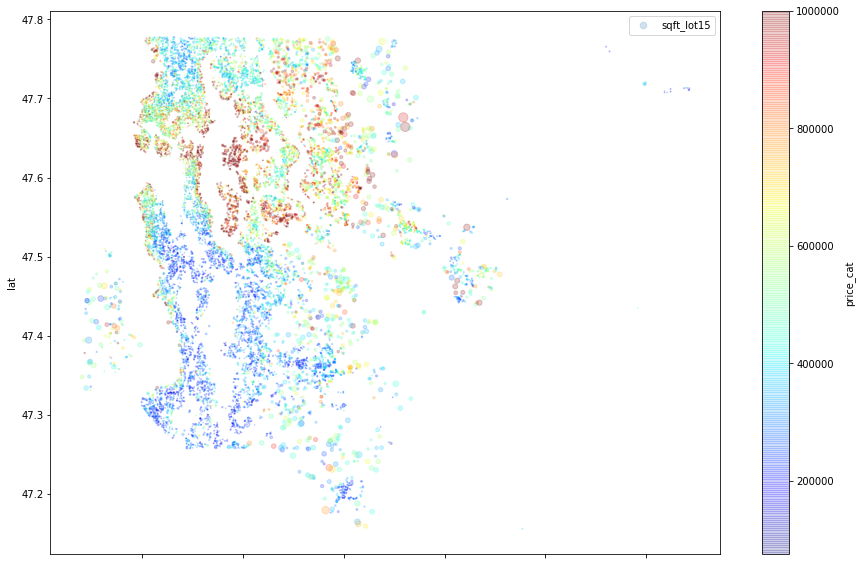

In [8]:
full_dataset.plot(
    kind='scatter',
    x='long',
    y='lat',
    alpha=.2,
    s=full_dataset['sqft_lot15']/10000,
    label='sqft_lot15',
    figsize=(15,10),
    c='price_cat',
    cmap=plt.get_cmap('jet'),
    colorbar=True
)

In [9]:
full_dataset.drop('price_cat', axis=1, inplace=True)

In [10]:
full_dataset['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07502330>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0899C5B0>]], dtype=object)

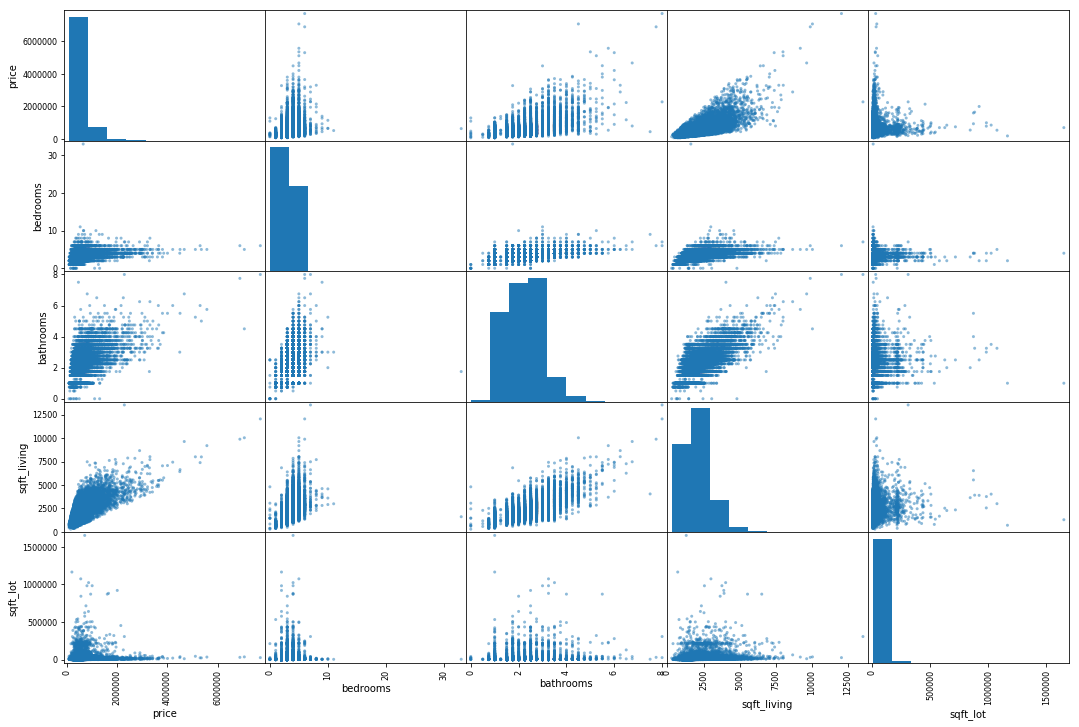

In [11]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
scatter_matrix(full_dataset[attributes], figsize=(18,12))

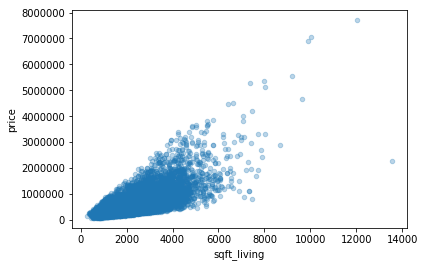

In [12]:
full_dataset.plot(kind='scatter', x='sqft_living', y='price', alpha=.3)

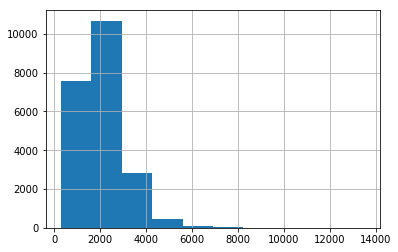

In [13]:
full_dataset['sqft_living'].hist()

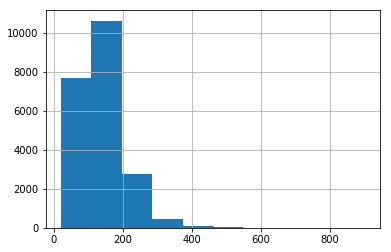

In [42]:
full_dataset['sqft_living_cat'] = np.ceil(full_dataset['sqft_living'] / 15)
# full_dataset['sqft_living_cat'] = full_dataset['sqft_living']
# full_dataset['sqft_living_cat'].where(full_dataset['sqft_living'] < 300, 300, inplace=True)

# full_dataset['sqft_living_cat'].where(full_dataset['sqft_living'] > 500, 500, inplace=True)
full_dataset['sqft_living_cat'].hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(full_dataset, full_dataset["sqft_living_cat"]):
    strat_train_set = full_dataset.loc[train_index]
    strat_test_set = full_dataset.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.